# Activation Function
makes transations to make nonlinearity
# Sigmoid Activation Function
Fast Logistic func, also called Gate

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.decomposition import PCA

In [ ]:
net = np.linspace(-10, 10, 100)

In [ ]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
sigmoid_values = sigmoid(net)
sigmoid_derivative_values = sigmoid_derivative(net)

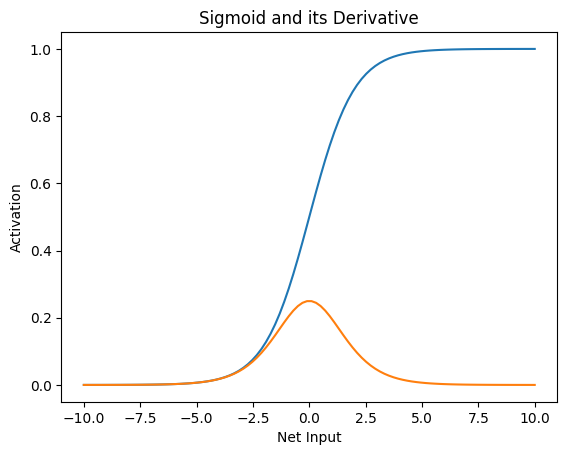

In [ ]:
plt.plot(net, sigmoid_values, label='Sigmoid')
plt.plot(net, sigmoid_derivative_values, label='Sigmoid Derivative')
plt.xlabel('Net Input')
plt.ylabel('Activation')
plt.title('Sigmoid and its Derivative')
plt.show()

In [ ]:
# Tanh Activation Function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Derivative of Tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [ ]:
# Calculate tanh and its derivative
tanh_values = tanh(net)
tanh_derivative_values = tanh_derivative(net)

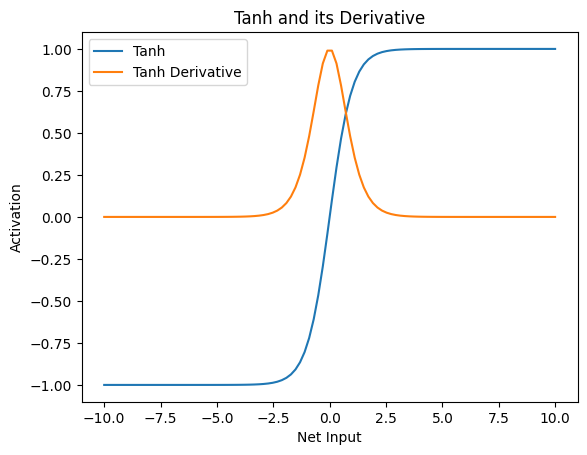

In [ ]:
# Plot the functions
plt.plot(net, tanh_values, label='Tanh')
plt.plot(net, tanh_derivative_values, label='Tanh Derivative')
plt.xlabel('Net Input')
plt.ylabel('Activation')
plt.title('Tanh and its Derivative')
plt.legend()
plt.show()

In [ ]:
# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

In [ ]:
# Calculate ReLU and its derivative
relu_values = relu(net)

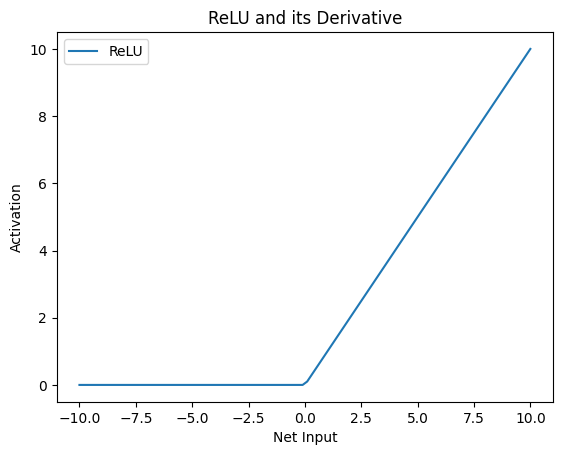

In [ ]:
# Plot the functions
plt.plot(net, relu_values, label='ReLU')
plt.xlabel('Net Input')
plt.ylabel('Activation')
plt.title('ReLU and its Derivative')
plt.legend()
plt.show()

In [ ]:
# Leaky ReLU Activation Function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

In [ ]:
# Calculate Leaky ReLU and its derivative
leaky_relu_values = leaky_relu(net)

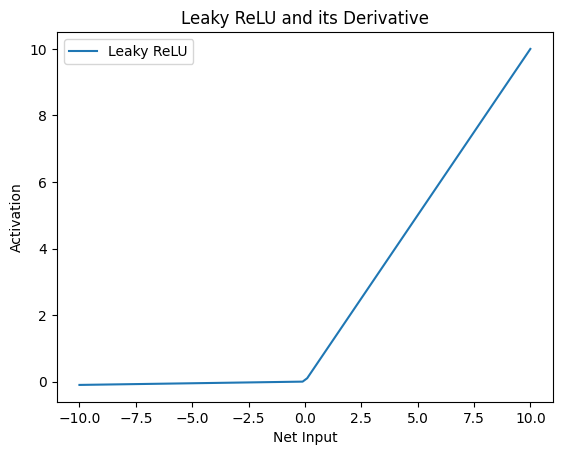

In [ ]:
# Plot the functions
plt.plot(net, leaky_relu_values, label='Leaky ReLU')
plt.xlabel('Net Input')
plt.ylabel('Activation')
plt.title('Leaky ReLU and its Derivative')
plt.legend()
plt.show()

In [ ]:
# Softplus Activation Function
def softplus(x):
    return np.log(1 + np.exp(x))

# Derivative of Softplus
def softplus_derivative(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Calculate softplus and its derivative
softplus_values = softplus(net)
softplus_derivative_values = softplus_derivative(net)

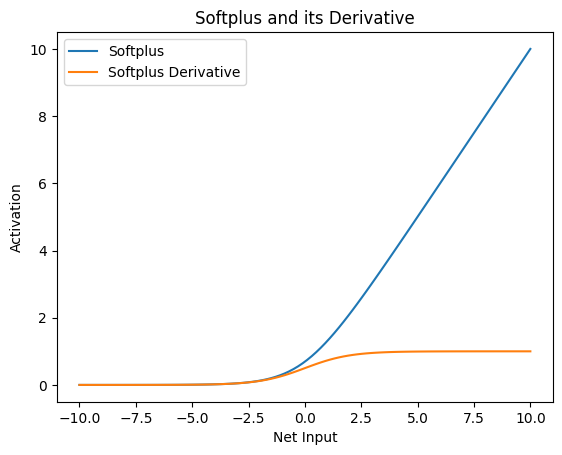

In [ ]:
# Plot the functions
plt.plot(net, softplus_values, label='Softplus')
plt.plot(net, softplus_derivative_values, label='Softplus Derivative')
plt.xlabel('Net Input')
plt.ylabel('Activation')
plt.title('Softplus and its Derivative')
plt.legend()
plt.show()

#Telco Customer Churn Prediction using nn

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# to convert text data into numerical
le = LabelEncoder()
df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))


Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges  :  [2505 1466  157 ... 2994 2660 5407]  =  ['29.85' '1889.5'

In [ ]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


Outliers in column 'gender':
Empty DataFrame
Columns: [gender]
Index: []
--------------------
Outliers in column 'SeniorCitizen':
      SeniorCitizen
20                1
30                1
31                1
34                1
50                1
...             ...
7023              1
7029              1
7031              1
7032              1
7041              1

[1142 rows x 1 columns]
--------------------
Outliers in column 'Partner':
Empty DataFrame
Columns: [Partner]
Index: []
--------------------
Outliers in column 'Dependents':
Empty DataFrame
Columns: [Dependents]
Index: []
--------------------
Outliers in column 'tenure':
Empty DataFrame
Columns: [tenure]
Index: []
--------------------
Outliers in column 'PhoneService':
      PhoneService
0                0
3                0
7                0
20               0
27               0
...            ...
7003             0
7007             0
7029             0
7036             0
7040             0

[682 rows x 1 columns]
-----

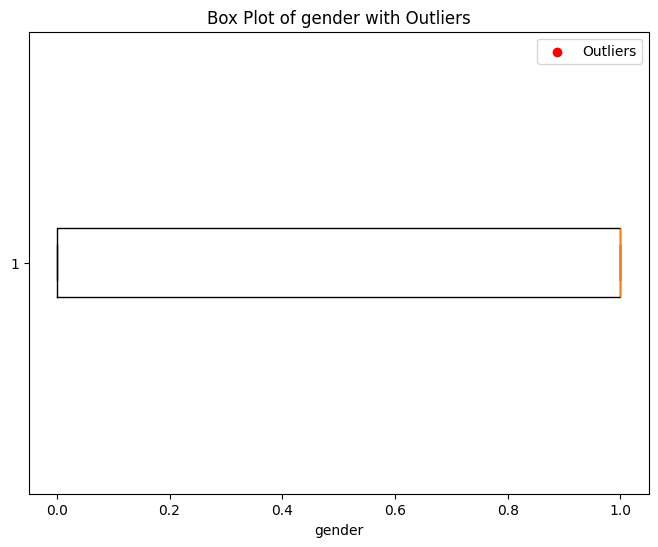

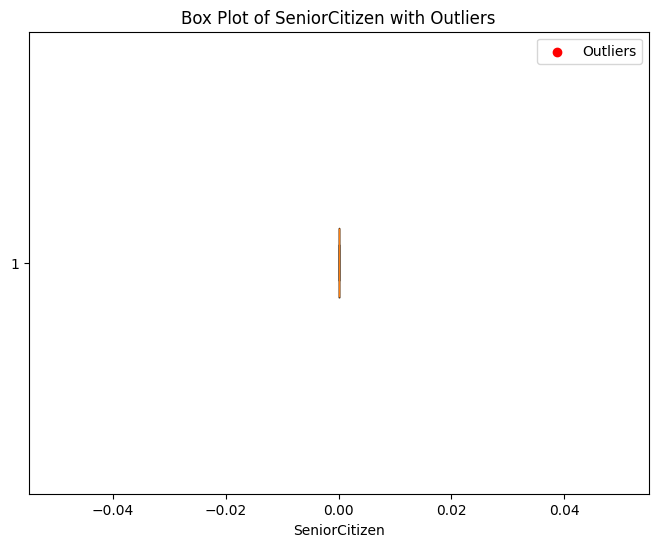

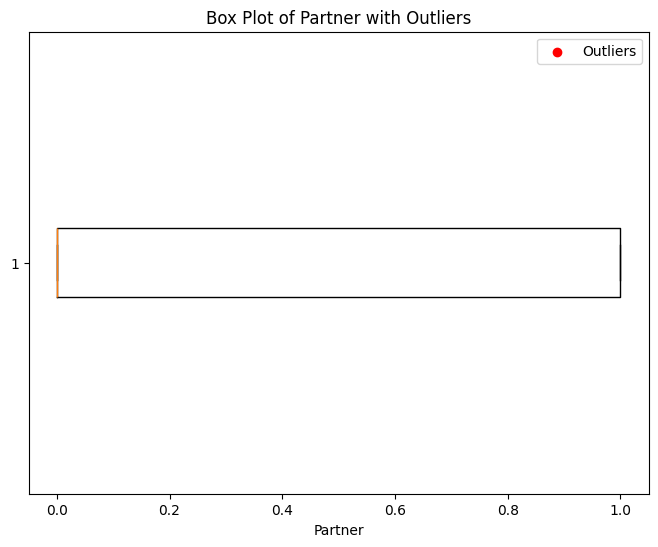

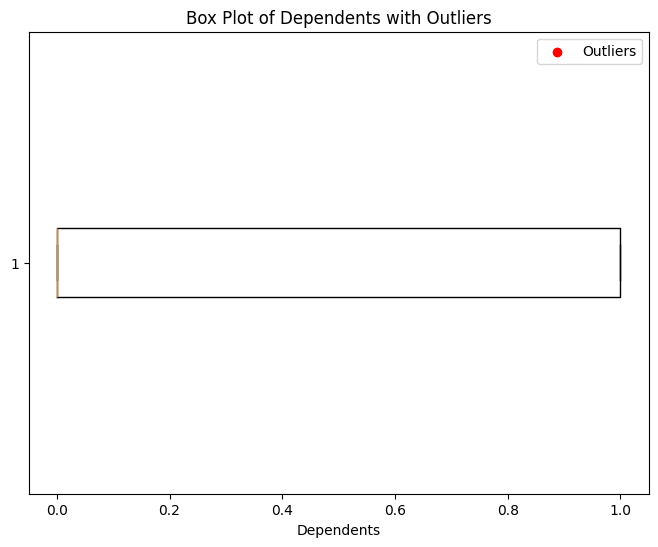

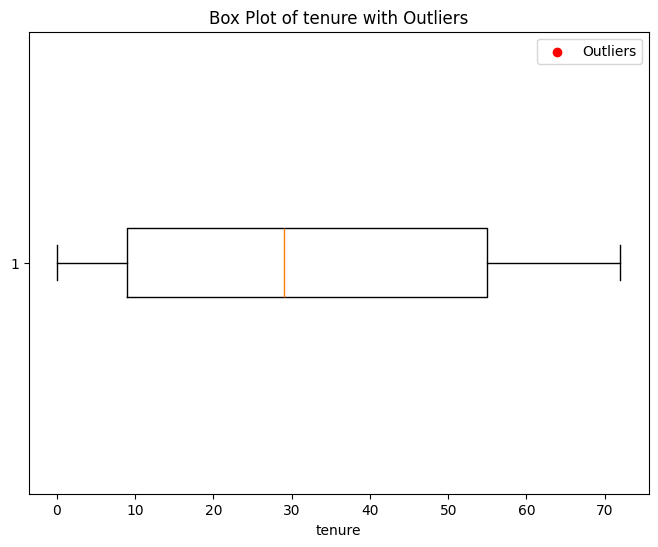

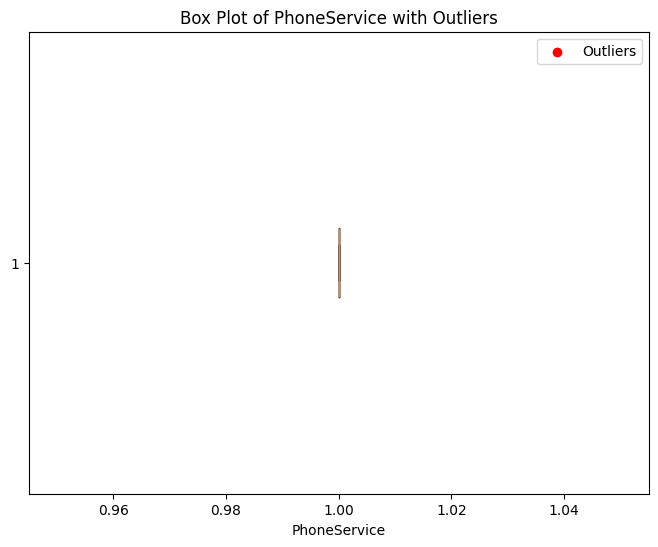

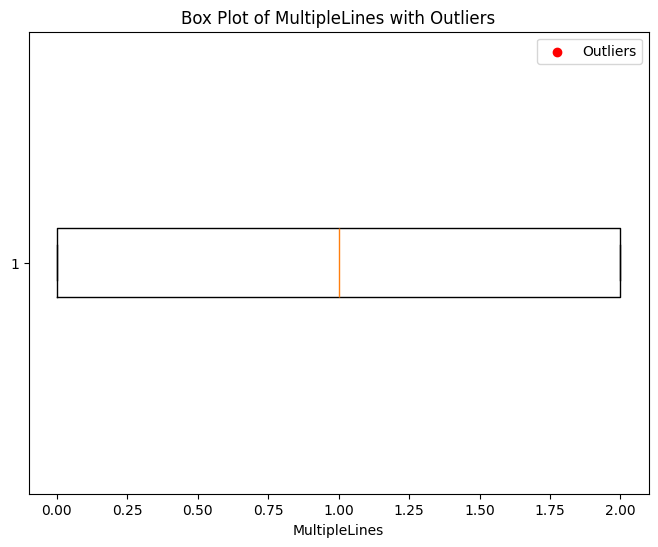

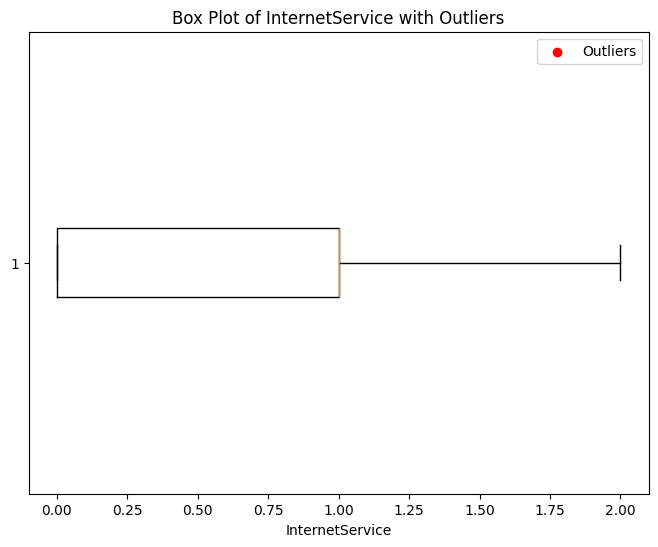

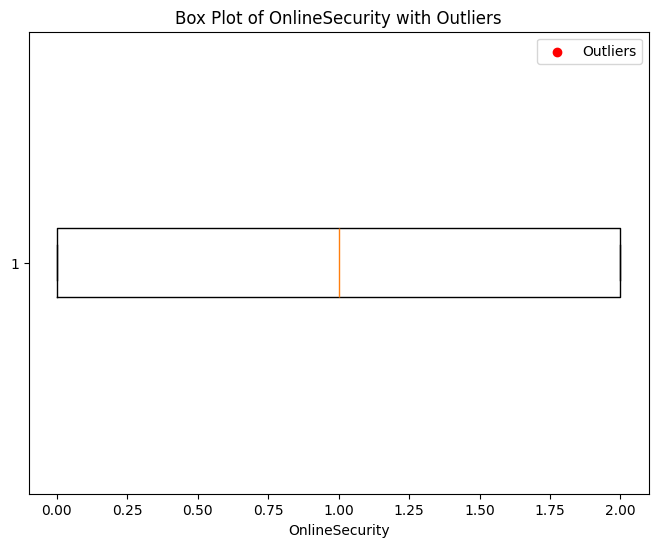

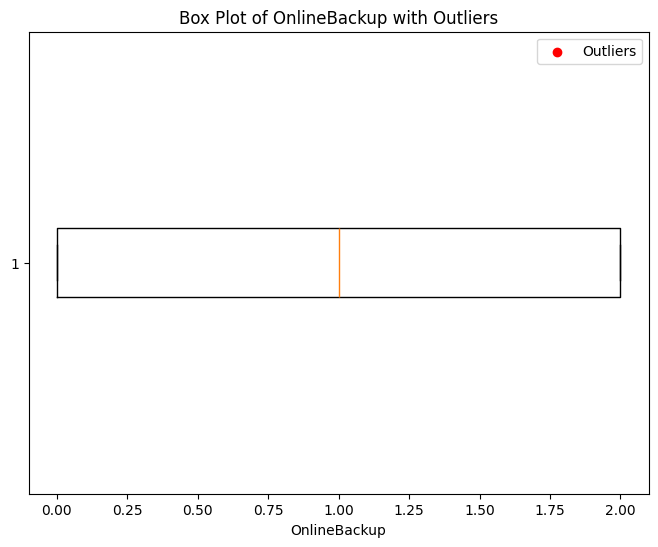

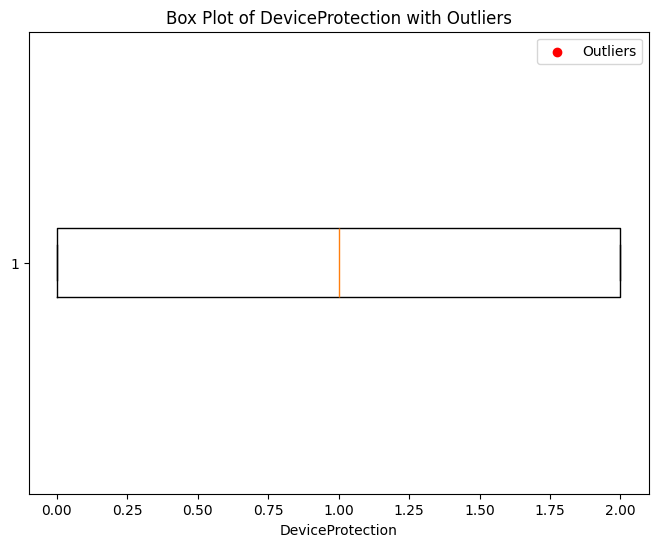

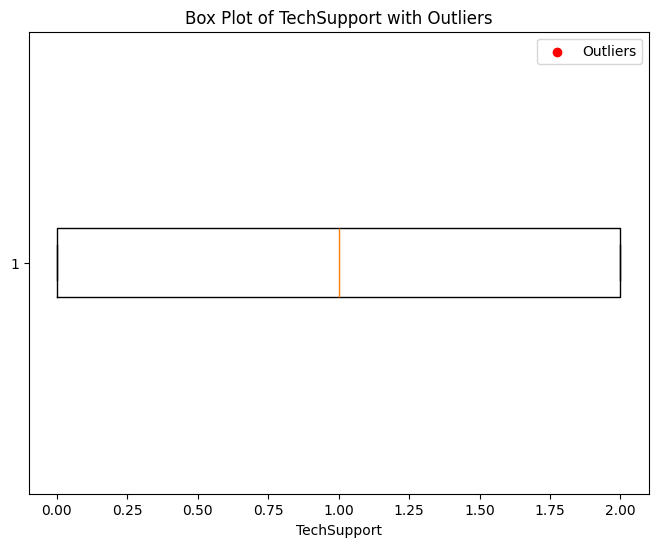

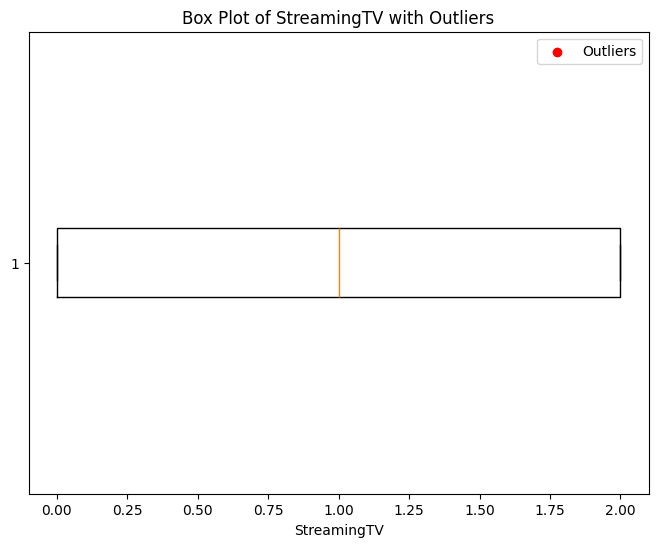

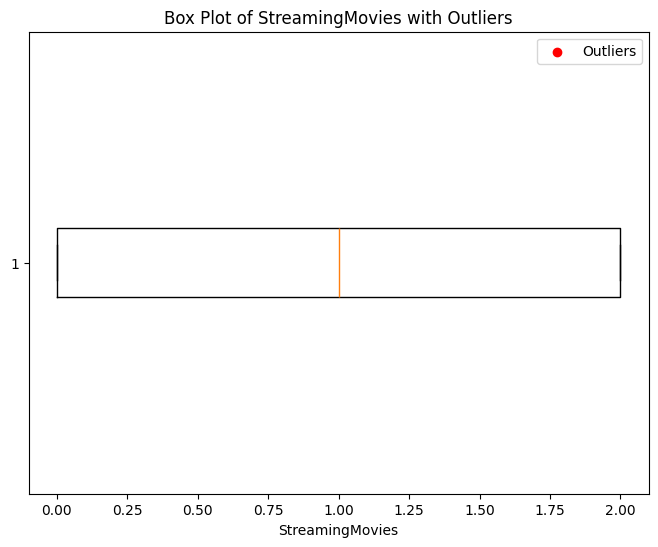

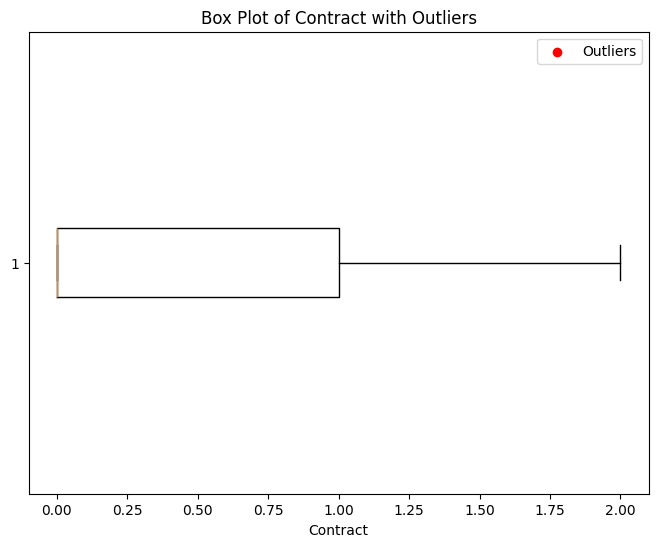

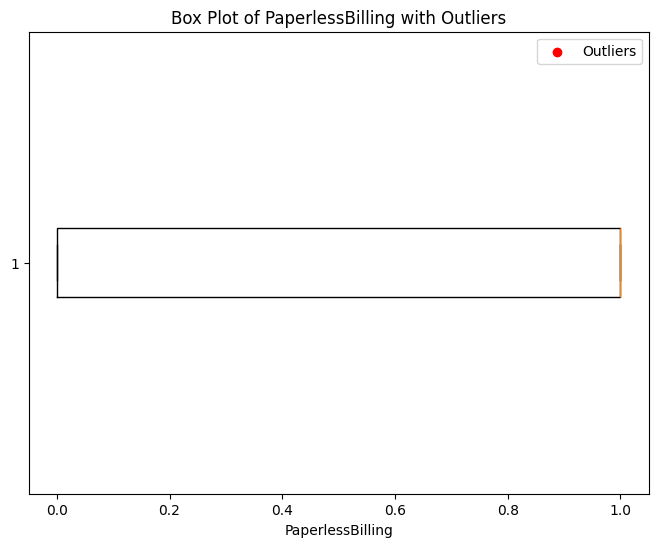

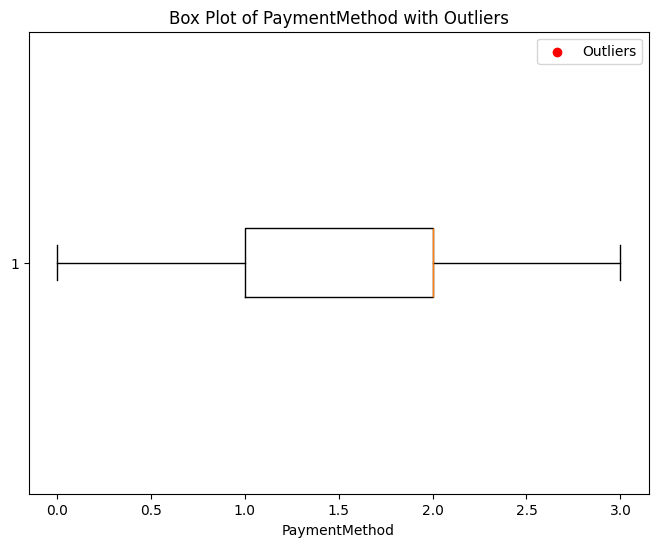

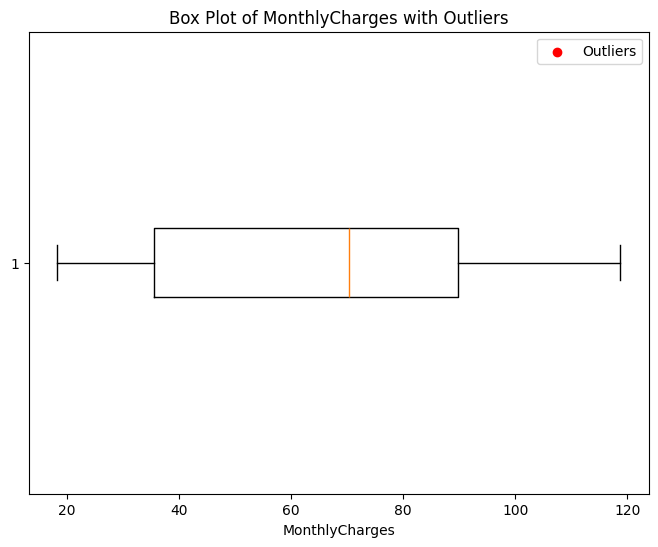

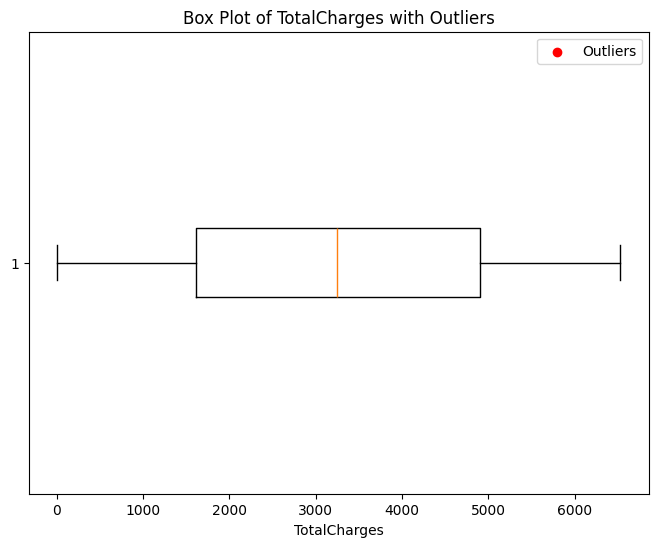

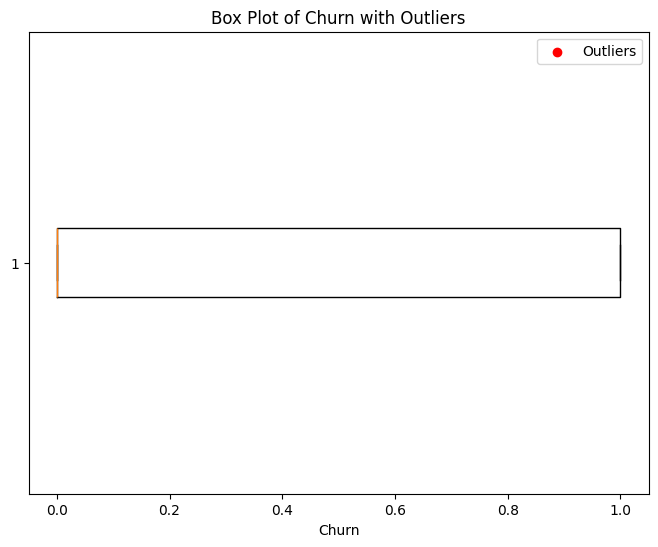

In [ ]:
numerical_cols = df1.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]

    # Print or process outliers
    print(f"Outliers in column '{col}':")
    print(outliers[[col]])
    print("-" * 20)


# Example of replacing outliers with the bounds
for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1[col] = np.where(df1[col] > upper_bound, upper_bound, df1[col])
    df1[col] = np.where(df1[col] < lower_bound, lower_bound, df1[col])

    # Identify outliers

    # Create the box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(df1[col], vert=False)  # Horizontal box plot
    plt.scatter(outliers[col], [1] * len(outliers), color='red', label='Outliers')  # Highlight outliers
    plt.xlabel(col)
    plt.title(f'Box Plot of {col} with Outliers')
    plt.legend()
    plt.show()

In [ ]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0.0,0.0,0.0,45.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0.0,1.0,1.0,11.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,0.0,1.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [ ]:
x= df1.drop('Churn', axis=1)
y= df1['Churn']

In [ ]:
std_scaler = StandardScaler()
x['TotalCharges'] = std_scaler.fit_transform(x[['TotalCharges']])
x['MonthlyCharges'] = std_scaler.fit_transform(x[['MonthlyCharges']])
x['tenure'] = std_scaler.fit_transform(x[['tenure']])

In [ ]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,-1.277445,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.160323,-0.398608
1,1.0,0.0,0.0,0.0,0.066327,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.259629,-0.948762
2,1.0,0.0,0.0,0.0,-1.236724,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.362660,-1.641883
3,1.0,0.0,0.0,0.0,0.514251,1.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.746535,-0.983710
4,0.0,0.0,0.0,0.0,-1.236724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.197365,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,-0.340876,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.665992,-0.879397
7039,0.0,0.0,1.0,1.0,1.613701,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.277533,1.292099
7040,0.0,0.0,1.0,1.0,-0.870241,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.168632,-0.139680
7041,1.0,0.0,1.0,0.0,-1.155283,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.320338,-0.316534


In [ ]:
y

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
7038,0.0
7039,0.0
7040,0.0
7041,1.0


In [ ]:
y.value_counts()

,count
Churn,
0.0,5174
1.0,1869


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                     │ (None, 512)                 │          10,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,273 (337.00 KB)

 Trainable params: 86,273 (337.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_model = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7659 - loss: 0.4715 - val_accuracy: 0.8070 - val_loss: 0.4096
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4217 - val_accuracy: 0.8034 - val_loss: 0.4122
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.4327 - val_accuracy: 0.8091 - val_loss: 0.4085
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.4217 - val_accuracy: 0.8091 - val_loss: 0.4086
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4196 - val_accuracy: 0.7999 - val_loss: 0.4218
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8126 - loss: 0.4134 - val_accuracy: 0.8041 - val_loss: 0.4109
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8166 - loss: 0.4016 - val_accuracy: 0.7999 - val_loss: 0.4168
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8058 - loss: 0.4116 - val_accuracy: 0

In [ ]:
y_pred = model.predict(x_test)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.6685931 ],
       [0.13703708],
       [0.00644757],
       ...,
       [0.0474812 ],
       [0.0159958 ],
       [0.43200493]], dtype=float32)

In [ ]:
print(confusion_matrix(y_test, y_pred.round()))

[[960  76]
 [201 172]]


In [ ]:
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7973 - loss: 0.4195


[0.41867807507514954, 0.8034066557884216]

In [ ]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87      1036
         1.0       0.69      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



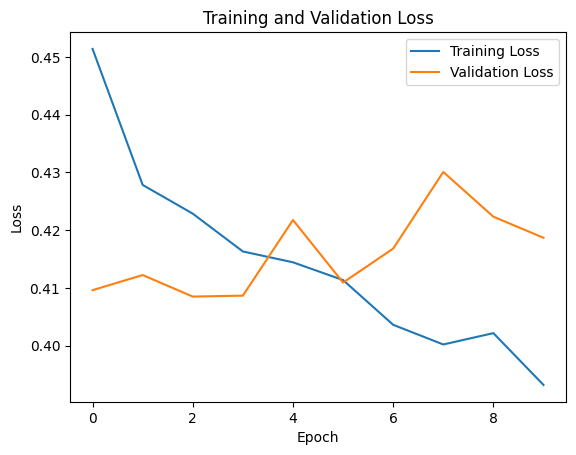

In [ ]:
# Assuming 'train_model' is the history object returned by model.fit
plt.plot(train_model.history['loss'], label='Training Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#import keras # No need to import keras separately

#preprocess.
# Import ImageDataGenerator from tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 97% 219M/225M [00:03<00:00, 73.6MB/s]
100% 225M/225M [00:03<00:00, 59.9MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("flowers-recognition.zip", "r") as zip_ref:
    zip_ref.extractall("flowers_data")

print("Dataset extracted to 'flowers_data' folder.")


Dataset extracted to 'flowers_data' folder.


In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/flowers_data/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers_data/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers_data/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers_data/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers_data/flowers/rose'

In [ ]:
def assign_label(img,flower_type):
    return flower_type
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))


In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:01<00:00, 402.76it/s]

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:01<00:00, 436.59it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:01<00:00, 732.71it/s]

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 426.83it/s]

3533


In [ ]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 346.12it/s]

4317


In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [ ]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7776)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,981,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,143,749 (15.81 MB)

 Trainable params: 4,143,749 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size=128
epochs=50
History = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 724ms/step - accuracy: 0.2650 - loss: 1.5790 - val_accuracy: 0.4963 - val_loss: 1.2463
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4453 - loss: 1.3476 - val_accuracy: 0.4676 - val_loss: 1.2056
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 543ms/step - accuracy: 0.4729 - loss: 1.2313 - val_accuracy: 0.5667 - val_loss: 1.0931
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5625 - loss: 1.1160 - val_accuracy: 0.5231 - val_loss: 1.1944
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 519ms/step - accuracy: 0.5364 - loss: 1.1266 - val_accuracy: 0.6009 - val_loss: 0.9891
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5234 - loss: 1.1198 - val_accuracy: 0.6056 - val_loss: 0.9787
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 525ms/step - accuracy: 0.6093 - loss: 1.0109 - val_accuracy: 0.6250 - val_loss: 0.9914
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6250 - loss: 1.0007 - val_accuracy: 0.

# Alex Net

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:03<00:00, 24.5MB/s]
100% 2.70G/2.70G [02:03<00:00, 23.4MB/s]


In [ ]:
!unzip new-plant-diseases-dataset.zip -d /content/plant_diseases


Streaming output truncated to the last 5000 lines.
  inflating: /content/plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy/640bb1de-c435-49a6-9784-30c1e0770a26___RS_HL 1685_90deg.JPG  
  inflating: /content/plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy/640bb1de-c435-49a6-9784-30c1e0770a26___RS_HL 1685_new30degFlipLR.JPG  
  inflating: /content/plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy/6419aea0-0a20-4ec6-bda4-5fcdda4eadd8___RS_HL 1930.JPG  
  inflating: /content/plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy/6419aea0-0a20-4ec6-bda4-5fcdda4eadd8___RS_HL 1930_270deg.JPG  
  inflating: /content/plant_diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healt

In [ ]:
# Importing Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
# Import BatchNormalization directly from keras.layers
from keras.layers import BatchNormalization # BatchNormalization is now imported directly from keras.layers

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4, 4, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,117,790 (107.26 MB)

 Trainable params: 28,096,654 (107.18 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [ ]:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d_5
1 max_pooling2d_3
2 batch_normalization_10
3 conv2d_6
4 max_pooling2d_4
5 batch_normalization_11
6 conv2d_7
7 batch_normalization_12
8 conv2d_8
9 batch_normalization_13
10 conv2d_9
11 max_pooling2d_5
12 batch_normalization_14
13 flatten_1
14 dense_4
15 dropout_3
16 batch_normalization_15
17 dense_5
18 dropout_4
19 batch_normalization_16
20 dense_6
21 dropout_5
22 batch_normalization_17
23 dense_7


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

import os

# Assuming base_dir is the path to the augmented dataset folder
base_dir = "/content/plant_diseases/New Plant Diseases Dataset(Augmented)/" # Added a trailing slash

# Print the contents of base_dir to check if the 'train' directory exists
print(os.listdir(base_dir))

training_set = train_datagen.flow_from_directory(os.path.join(base_dir, 'train'), # Use os.path.join to construct paths
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(os.path.join(base_dir, 'valid'), # Use os.path.join to construct paths
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

['New Plant Diseases Dataset(Augmented)']


FileNotFoundError: [Errno 2] No such file or directory: '/content/plant_diseases/New Plant Diseases Dataset(Augmented)/train'

# VGG 16 Covid

In [ ]:
# uploading covid datasets on cloud
!wget http://cb.lk/covid_19
!unzip covid_19.zip

--2025-01-01 18:37:53--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3031::6815:48cb, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2025-01-01 18:37:54--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0 [following]
--2025-01-01 18:37:54--  https://www.dropbox.com/scl/fi/8jafvmu9s23e3bpmaou3c/CovidDataset-20200427T133042Z-001.zip?rlkey=p1slfgi51d7cmi5161ixvicmq&dl=0
Reusing existi

In [ ]:
from google.colab import drive
# drive.mount('/content/Mydrive/DataSets')
drive.mount('/content/Mydrive/' )
!unzip '/content/covid_19'

Drive already mounted at /content/Mydrive/; to attempt to forcibly remount, call drive.mount("/content/Mydrive/", force_remount=True).
Archive:  /content/covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val

In [ ]:
# Install TensorFlow
!pip install tensorflow

# Import necessary libraries
import keras
from keras.models import *
from keras.preprocessing import *  # For Data preprocessing before making my own Model
from keras.layers import *
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image
import tensorflow as tf # Import tensorflow as tf

In [ ]:
#using Data augmentation in training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
    )
#using Rescale only in Testing
test_datagen=ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
training_set = train_datagen.flow_from_directory(
        r'/content/CovidDataset/Train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        r'/content/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=2,activation="softmax"))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,668,738 (155.14 MB)

 Trainable params: 40,668,738 (155.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

In [ ]:
results=model.fit(
    training_set,
    steps_per_epoch=2,
    epochs=20,
    validation_data=test_set,
    validation_steps=2
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.4375 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step - accuracy: 0.4167 - loss: 0.6935
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4792 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.4792 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 0.6931 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4688 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/st

Text(0.5, 0, 'epoch')

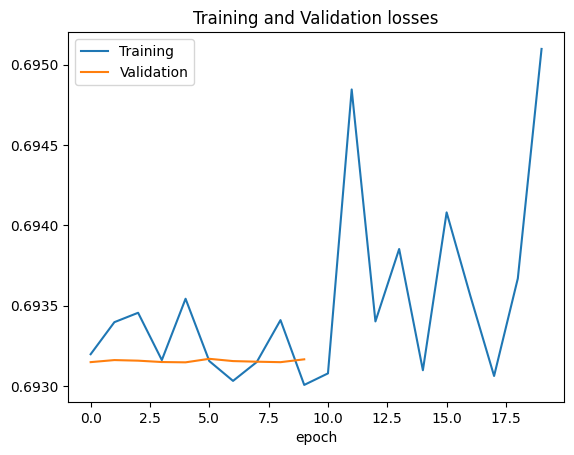

In [ ]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

# Resnet

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition


Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 99% 223M/225M [00:12<00:00, 23.4MB/s]
100% 225M/225M [00:12<00:00, 19.5MB/s]


In [ ]:
!unzip flowers-recognition.zip -d /content/flowers


Archive:  flowers-recognition.zip
  inflating: /content/flowers/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/flowers/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/flowers/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/flowers/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/flowers/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/flowers/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/flowers/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/flowers/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/flowers/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/flowers/flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: /content/flowers/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: /content/flowers/flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: /content/flowers/flowers/daisy/10466290366_cc72e33532.jpg  
  inflat

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, runniЃng this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# Import ResNet50 directly from tensorflow.keras.applications
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
# Import preprocess_input from tensorflow.keras.applications.resnet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
data_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )

image_size = 224
batch_size = 10
train_generator = data_generator.flow_from_directory(
        '/content/flowers/flowers',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 4317 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet' ))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,907,845 (114.09 MB)

 Trainable params: 6,309,893 (24.07 MB)

 Non-trainable params: 23,597,952 (90.02 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
count = sum([len(files) for r, d, files in os.walk("/content/flowers/flowers")])

model.fit(
        train_generator,
        steps_per_epoch=int(count/batch_size) + 1,
        epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


432/432 ━━━━━━━━━━━━━━━━━━━━ 91s 162ms/step - accuracy: 0.6241 - loss: 1.7422
Epoch 2/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


432/432 ━━━━━━━━━━━━━━━━━━━━ 71s 149ms/step - accuracy: 0.7541 - loss: 0.7059
Epoch 4/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.7844 - loss: 0.6152
Epoch 6/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 66s 150ms/step - accuracy: 0.7988 - loss: 0.5947
Epoch 8/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 65s 147ms/step - accuracy: 0.8071 - loss: 0.5519
Epoch 10/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [2]:
! pip install kaggle


In [4]:
# Download the RSNA Bone Age dataset
!kaggle datasets download -d kmader/rsna-bone-age

Dataset URL: https://www.kaggle.com/datasets/kmader/rsna-bone-age
License(s): other
... resuming from 144703488 bytes (9827652975 bytes left) ...
  8% 787M/9.29G [00:31<06:57, 21.9MB/s]
User cancelled operation


# Auto Encoder , Decoder (CNN)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.6371 - val_loss: 0.5945
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5924 - val_loss: 0.5901
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5884 - val_loss: 0.5885
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5862 - val_loss: 0.5862
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5855 - val_loss: 0.5849
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5840 - val_loss: 0.5843
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5829 - val_loss: 0.5834
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5823 - val_loss: 0.5844
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5824 - val_loss: 0.5824
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5812 - val_loss: 0.5821
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


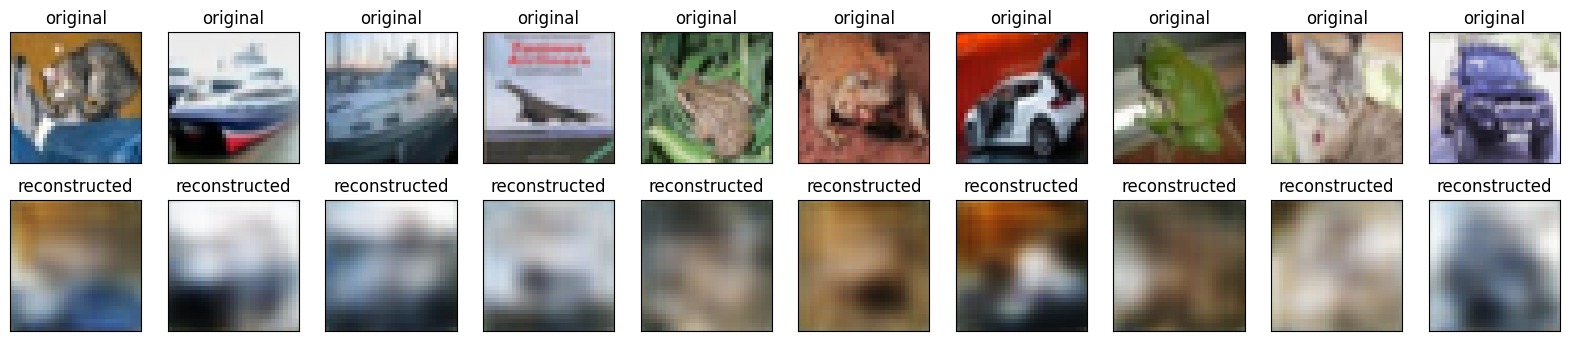

In [11]:
# prompt: apply autoencoder on cifar 10

import keras
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the autoencoder model
input_img = keras.Input(shape=(32, 32, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) # added padding='same' to this layer
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct images using the trained autoencoder
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 16, 16, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 16, 16, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_17 (UpSampling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 32, 32, 3)           │             435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,891 (58.17 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,928 (38.79 KB)